In [ ]:
# Notes on how to run the statistical analysis code 

# The test dataset is called 'filename.csv'
# 'filename.csv' has measurements (Y) for different variables (X)
# The first column (X1) has 2 groups (independent variables)
# The second column (Y1) has measurements from 2 variables, to demonstrate t-tests
# The third column (X2) has 3 groups (independent variables)
# The fourth column (Y2) has measurements from 3 variables, to demonstrate ANOVAs

# Here are the steps to use this code for your data:
# -Create .csv file in tall format
# -Label the column with dependent variable Y (or Y1 if more than two independent variables)
# -Label the column with independent variable X (or X1 if more than two dependent variables)
# -Substitute "~/filename.csv" with the pathname to your data file
# -Run cell (Shift + Enter)

# Code for plotting the data with ggplot2 is provided at the end of the notebook

In [3]:
# F test
# Compare the variances of two populations

# Load data (csv file in tall format)
stats <- read.csv("~/filename.csv")

# Define variables 
attach(stats)

# Run F test 
var.test(Y1 ~ X1, data = stats)

# Calculate descriptive statistics
library(plyr)

cdata <- ddply(stats, c("X1"), summarise,
N    = length(Y1),
mean = mean(Y1),
sd   = sd(Y1),
se   = sd / sqrt(N)
)
cdata

detach(stats)


	F test to compare two variances

data:  Y1 by X1
F = 0.50192, num df = 12, denom df = 23, p-value = 0.2155
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1953053 1.5211167
sample estimates:
ratio of variances 
         0.5019233 


X1,N,mean,sd,se
,18,NA,NA,NA
Control,13,4.600343,5.796878,1.607765
Stim,24,5.749513,8.182302,1.670205


In [2]:
# Shapiro-Wilk test for normality


# Load data (csv file in tall format)
stats <- read.csv("~/filename.csv")

# Define variables 
attach(stats)

# Run Shapiro-Wilk test 
# Note that this code tests normality of both groups combined
# To test individual groups you must make separate columns and test individually

shapiro.test(Y1) # p-value=1 normal / p-value=0 not normal


# Calculate descriptive statistics
library(plyr)

cdata <- ddply(stats, c("X1"), summarise,
N    = length(Y1),
mean = mean(Y1),
sd   = sd(Y1),
se   = sd / sqrt(N)
)
cdata

detach(stats)


	Shapiro-Wilk normality test

data:  Y1
W = 0.73557, p-value = 8.326e-07


X1,N,mean,sd,se
,18,NA,NA,NA
Control,13,4.600343,5.796878,1.607765
Stim,24,5.749513,8.182302,1.670205


In [2]:
# Levene's test 
# Compare the variances of k samples, where k can be more than two samples. 
# It’s an alternative to the Bartlett’s test that is less sensitive to departures from normality.

library(Rcmdr)

# Load data (csv file in tall format)
stats <- read.csv("~/filename.csv")

# Define variables 
attach(stats)

# Run Levene's test
leveneTest(Y1, X1)

# Calculate descriptive statistics
library(plyr)

cdata <- ddply(stats, c("X1"), summarise,
N    = length(Y1),
mean = mean(Y1),
sd   = sd(Y1),
se   = sd / sqrt(N)
)
cdata

detach(stats)

Loading required package: splines
Loading required package: RcmdrMisc
Loading required package: car
Loading required package: sandwich
The Commander GUI is launched only in interactive sessions


,Df,F value,Pr(>F)
group,1,0.1571269,0.6942221
,35,NA,NA


X1,N,mean,sd,se
,18,NA,NA,NA
Control,13,4.600343,5.796878,1.607765
Stim,24,5.749513,8.182302,1.670205


In [1]:
# Wilcox rank sum test
# Nonparametric alternative to t-test

# Load data (csv file in tall format)
stats <- read.csv("~/filename.csv")

# Define variables 
attach(stats)

# Run Wilcox rank sum test 
wilcox.test(Y1 ~ X1, data=stats)

# Calculate descriptive statistics
library(plyr)

cdata <- ddply(stats, c("X1"), summarise,
N    = length(Y1),
mean = mean(Y1),
sd   = sd(Y1),
se   = sd / sqrt(N)
)
cdata

detach(stats)


	Wilcoxon rank sum test

data:  Y1 by X1
W = 141, p-value = 0.6489
alternative hypothesis: true location shift is not equal to 0


X1,N,mean,sd,se
,18,NA,NA,NA
Control,13,4.600343,5.796878,1.607765
Stim,24,5.749513,8.182302,1.670205


In [4]:
# Kruskal-Wallis test
# Non-parametric alternative to ANOVA

# Load data (csv file in tall format)
stats <- read.csv("~/filename.csv")

# Define variables 
attach(stats)

# Run Krusal-Wallis test
kruskal.test(Y1 ~ X1, data=stats)

# Calculate descriptive statistics
library(plyr)

cdata <- ddply(stats, c("X2"), summarise,
N    = length(Y2),
mean = mean(Y2),
sd   = sd(Y2),
se   = sd / sqrt(N)
)
cdata

detach(stats)


	Kruskal-Wallis rank sum test

data:  Y1 by X1
Kruskal-Wallis chi-squared = 0.22773, df = 1, p-value = 0.6332


X2,N,mean,sd,se
Control,13,4.600343,5.7968781,1.6077647
Stim,24,5.749513,8.1823021,1.6702054
Stim_Drug,18,2.024242,0.7606184,0.1792795


In [3]:
# Dunn posthoc test
# For multiple comparisons of the Kruskal-Wallis test

library(FSA)
# https://cran.r-project.org/web/packages/dunn.test/dunn.test.pdf

# Load data (csv file in tall format)
stats <- read.csv("~/filename.csv")

# Define variables 
attach(stats)

dunnTest(Y2 ~ X2,
              data=stats,
              method="bonferroni")    # Can adjust p-values; 
                              # See ?p.adjust for options 

# Calculate descriptive statistics
library(plyr)

cdata <- ddply(stats, c("X2"), summarise,
N    = length(Y2),
mean = mean(Y2),
sd   = sd(Y2),
se   = sd / sqrt(N)
)
cdata

detach(stats)

## FSA v0.8.13. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.
Dunn (1964) Kruskal-Wallis multiple comparison
  p-values adjusted with the Bonferroni method.



           Comparison          Z   P.unadj P.adj
1      Control - Stim -0.3654162 0.7148008     1
2 Control - Stim_Drug -0.2242580 0.8225566     1
3    Stim - Stim_Drug  0.1417980 0.8872395     1

X2,N,mean,sd,se
Control,13,4.600343,5.7968781,1.6077647
Stim,24,5.749513,8.1823021,1.6702054
Stim_Drug,18,2.024242,0.7606184,0.1792795


In [2]:
# Students t-test

# Load data (csv file in tall format)
stats <- read.csv("~/filename.csv")

# Define variables 
attach(stats)

# Run t-Test
t.test(Y1 ~ X1, stats)

# Calculate descriptive statistics
library(plyr)
cdata <- ddply(stats, c("X1"), summarise,
N    = length(Y1),
mean = mean(Y1),
sd   = sd(Y1),
se   = sd / sqrt(N)
)
cdata

detach(stats)


	Welch Two Sample t-test

data:  Y1 by X1
t = -0.4957, df = 32.269, p-value = 0.6235
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.869843  3.571502
sample estimates:
mean in group Control    mean in group Stim 
             4.600343              5.749513 


X1,N,mean,sd,se
,18,NA,NA,NA
Control,13,4.600343,5.796878,1.607765
Stim,24,5.749513,8.182302,1.670205


In [1]:
# One-way ANOVA with Tukey Post-hoc test

# Load data (csv file in tall format)
stats <- read.csv("~/filename.csv")

# Define variables
attach(stats)

# Run one-way ANOVA on columns ()
ANOVA.aov = aov(Y2 ~ X2)

# View results from ANOVA
ANOVA.aov

# View more results from ANOVA
summary(ANOVA.aov)

# Perform posthoc (Tukey)
TukeyHSD(ANOVA.aov)

# Calculate descriptive statistics
library(plyr)

cdata <- ddply(stats, c("X2"), summarise,
N    = length(Y2),
mean = mean(Y2),
sd   = sd(Y2),
se   = sd / sqrt(N)
)
cdata

detach(stats)

Call:
   aov(formula = Y2 ~ X2)

Terms:
                       X2 Residuals
Sum of Squares   144.7284 1952.9323
Deg. of Freedom         2        52

Residual standard error: 6.128327
Estimated effects may be unbalanced

            Df Sum Sq Mean Sq F value Pr(>F)
X2           2  144.7   72.36   1.927  0.156
Residuals   52 1952.9   37.56               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Y2 ~ X2)

$X2
                       diff       lwr      upr     p adj
Stim-Control       1.149170 -3.942379 6.240719 0.8497122
Stim_Drug-Control -2.576101 -7.957551 2.805349 0.4852147
Stim_Drug-Stim    -3.725271 -8.335359 0.884816 0.1351965


X2,N,mean,sd,se
Control,13,4.600343,5.7968781,1.6077647
Stim,24,5.749513,8.1823021,1.6702054
Stim_Drug,18,2.024242,0.7606184,0.1792795


X2,N,mean,sd,se
Control,13,4.600343,5.7968781,1.6077647
Stim,24,5.749513,8.1823021,1.6702054
Stim+Drug,18,2.024242,0.7606184,0.1792795


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

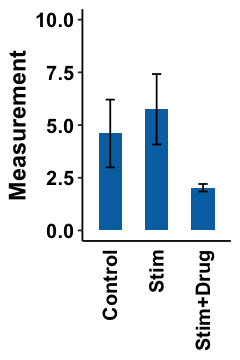

In [8]:
# Plot data as histogram with mean +/- sem 

library(ggplot2)
library(repr)


# Load data (csv file in tall format)
stats <- read.csv("~/filename.csv")

# Define variables
attach(stats)

# Adjust plot size
options(repr.plot.width=2, repr.plot.height=3)

# Calculate descriptive statistics
library(plyr)

cdata <- ddply(stats, c("X2"), summarise,
N    = length(Y2),
mean = mean(Y2),
sd   = sd(Y2),
se   = sd / sqrt(N)
)
cdata

# Generate histogram
ggplot(cdata, aes(x=X2, y=mean, group=1, width = 0.5)) +
    geom_histogram(fill="#0072B2", stat="identity")+
    geom_errorbar(aes(ymin=mean-se, ymax=mean+se),
        size=.5,    # Thinner lines
        width=.2,
        position=position_dodge(.9)) +
    ylim(0,10) +   
    #xlab("Condition") +
    ylab("Measurement") +
    #ggtitle("The Effect of Vitamin C on\nTooth Growth in Guinea Pigs") +
    #scale_y_continuous(breaks=0:20*4) +
    #theme_bw() +
    theme(axis.text.x=element_text(size=12, angle=90, hjust=(1), vjust=(0.5), colour="black", face="bold"),
           axis.text.y=element_text(size=12, colour="black", face="bold"),
           axis.title=element_text(size=14, face="bold"),
           axis.title.x=element_blank(),
           axis.ticks.x=element_blank())+
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
    panel.background = element_blank(), axis.line = element_line(colour = "black"))+
    scale_x_discrete(limits=c("Control", "Stim", "Stim+Drug"))

detach(stats)

X2,N,mean,sd,se
Control,13,4.600343,5.7968781,1.6077647
Stim,24,5.749513,8.1823021,1.6702054
Stim+Drug,18,2.024242,0.7606184,0.1792795


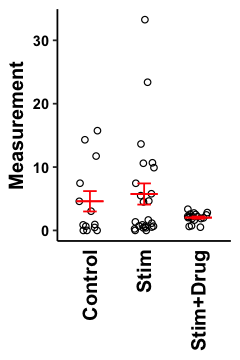

In [1]:
# Plot every point in the data with mean +/- sem 

library(ggplot2)
library(repr)


# Load data (csv file in tall format)
stats <- read.csv("~/filename.csv")

# Define variables
attach(stats)

# Adjust plot size
options(repr.plot.width=2, repr.plot.height=3)

# Calculate descriptive statistics
library(plyr)

cdata <- ddply(stats, c("X2"), summarise,
N    = length(Y2),
mean = mean(Y2),
sd   = sd(Y2),
se   = sd / sqrt(N)
)
cdata

# Generate graph
p <- ggplot(stats, aes(X2,Y2)) + 
    geom_point(position = position_jitter(width = 0.2), shape=1, stroke=.5) +
    stat_summary(fun.y = mean, fun.ymin = mean,fun.ymax = mean, geom = "errorbar", width = .5, colour = "red") + 
    stat_summary(fun.data = mean_se, geom = "errorbar", width = .25, colour = "red") +
    #stat_summary(fun.data = median.quartile, geom = "errorbar", width = .25, colour = "red") +
    #stat_summary(fun.y = mean, fun.ymin = mean, fun.ymax = mean, geom = "errorbar", width = 0.5, colour = "red") +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black")) +
    theme(axis.text.x = element_text(size=12, colour = "black", face="bold", vjust=(0.5), hjust=(1), angle=90),
          axis.text.y = element_text(colour = "black", face="bold"),
          axis.title.x=element_blank(),
          axis.title.y=element_text(size=12, face="bold"),
          axis.ticks.x=element_blank()) +
    ylab("Measurement") +
    #ylab(expression(bold(D~(mu*m^2/s)))) + 
    #ylim(0.0, 1.5)+
    scale_x_discrete(limits=c("Control", "Stim", "Stim+Drug"))
p

detach(stats)

opto_condition,N,mean,sd,se
,13,NA,NA,NA
mock,5,3479.400,746.8041,333.9809
stim,14,4848.143,2184.8731,583.9319


Warning message:
“Removed 13 rows containing non-finite values (stat_summary).”Warning message:
“Removed 13 rows containing non-finite values (stat_summary).”Warning message:
“Removed 13 rows containing missing values (geom_point).”

ERROR: Error in eval(expr, envir, enclos): '...' used in an incorrect context


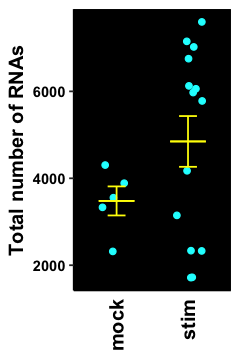

In [1]:
# Plot every point in the data with mean +/- sem 

library(ggplot2)
library(repr)


# Load data (csv file in tall format)
stats <- read.csv("~/Google Drive/Talks/2018_FlyClub_talk_data.csv")

# Define variables
attach(stats)

# Adjust plot size
options(repr.plot.width=2, repr.plot.height=3)

# Calculate descriptive statistics
library(plyr)

cdata <- ddply(stats, c("opto_condition"), summarise,
N    = length(opto_sr),
mean = mean(opto_sr),
sd   = sd(opto_sr),
se   = sd / sqrt(N)
)
cdata

# Generate graph
p <- ggplot(stats, aes(opto_condition,opto_sr)) + 
    geom_point(position = position_jitter(width = 0.2), shape=19, color="cyan", stroke=.5) +
    stat_summary(fun.y = mean, fun.ymin = mean,fun.ymax = mean, geom = "errorbar", width = .5, colour = "yellow") + 
    stat_summary(fun.data = mean_se, geom = "errorbar", width = .25, colour = "yellow") +
    #stat_summary(fun.data = median.quartile, geom = "errorbar", width = .25, colour = "red") +
    #stat_summary(fun.y = mean, fun.ymin = mean, fun.ymax = mean, geom = "errorbar", width = 0.5, colour = "red") +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_rect(fill = "black",colour = "black"), axis.line = element_line(colour = "black")) +
    theme(axis.text.x = element_text(size=12, colour = "black", face="bold", vjust=(0.5), hjust=(1), angle=90),
          axis.text.y = element_text(colour = "black", face="bold"),
          axis.title.x=element_blank(),
          axis.title.y=element_text(size=12, face="bold"),
          axis.ticks.x=element_blank()) +
    #theme(panel.background = element_rect(fill = "black",colour = "black")+
    ylab("Total number of RNAs") +
    #ylab(expression(bold(D~(mu*m^2/s)))) + 
    #ylim(0.0, 1.5)+
    scale_x_discrete(limits=c("mock", "stim"))
p
ggsave(filename="rRNA_lineprofile.pdf", plot=p, scale = 1, width = 4, height = 5, dpi = 600, limitsize = TRUE)

detach(stats)


	F test to compare two variances

data:  nmj_K_sr by nmj_K_condition_sr
F = 0.035299, num df = 20, denom df = 30, p-value = 1.205e-10
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.01608018 0.08290232
sample estimates:
ratio of variances 
        0.03529858 



	Welch Two Sample t-test

data:  nmj_K_sr by nmj_K_condition_sr
t = -3.3024, df = 33.073, p-value = 0.002307
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -578.3066 -137.4107
sample estimates:
mean in group mock mean in group stim 
          232.2381           590.0968 


nmj_K_condition_sr,N,mean,sd,se
,12,NA,NA,NA
mock,21,232.2381,110.5124,24.11578
stim,31,590.0968,588.2100,105.64564


Warning message:
“Removed 12 rows containing non-finite values (stat_summary).”Warning message:
“Removed 12 rows containing non-finite values (stat_summary).”Warning message:
“Removed 12 rows containing missing values (geom_point).”

Warning message:
“Removed 12 rows containing non-finite values (stat_summary).”Warning message:
“Removed 12 rows containing non-finite values (stat_summary).”Warning message:
“Removed 12 rows containing missing values (geom_point).”

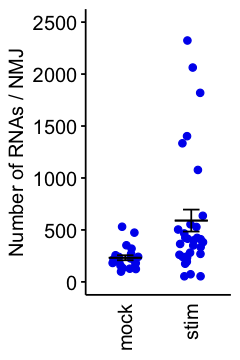

In [32]:
# Plot every point in the data with mean +/- sem 

library(ggplot2)
library(repr)


# Load data (csv file in tall format)
stats <- read.csv("~/Google Drive/Talks/2018_FlyClub_talk_data.csv")

# Define variables
attach(stats)

# Run F test 
var.test(nmj_K_sr ~ nmj_K_condition_sr, data = stats)

# Run T test
t.test(nmj_K_sr ~ nmj_K_condition_sr, stats)

# Adjust plot size
options(repr.plot.width=2, repr.plot.height=3)

# Calculate descriptive statistics
library(plyr)

cdata <- ddply(stats, c("nmj_K_condition_sr"), summarise,
N    = length(nmj_K_sr),
mean = mean(nmj_K_sr),
sd   = sd(nmj_K_sr),
se   = sd / sqrt(N)
)
cdata

# Generate graph
p <- ggplot(stats, aes(nmj_K_condition_sr,nmj_K_sr)) + 
    geom_point(position = position_jitter(width = 0.2), shape=19, color="blue2", size=1.75) +
    stat_summary(fun.y = mean, fun.ymin = mean,fun.ymax = mean, geom = "errorbar", width = .5, colour = "black") + 
    stat_summary(fun.data = mean_se, geom = "errorbar", width = .25, colour = "black") +
    #stat_summary(fun.data = median.quartile, geom = "errorbar", width = .25, colour = "red") +
    #stat_summary(fun.y = mean, fun.ymin = mean, fun.ymax = mean, geom = "errorbar", width = 0.5, colour = "red") +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black")) +
    theme(axis.text.x = element_text(size=12, colour = "black", vjust=(0.5), hjust=(1), angle=90),
          axis.text.y = element_text(size=12, colour = "black"),
          axis.title.x=element_blank(),
          axis.title.y=element_text(colour="black", size=12),
          axis.ticks.y=element_line(colour="black"),
          axis.ticks.x=element_blank()) +
    #theme(panel.background = element_rect(fill = "black",colour = "black")+
    ylab("Number of RNAs / NMJ") +
    #ylab(expression(bold(D~(mu*m^2/s)))) + 
    ylim(0.0, 2500)+
    scale_x_discrete(limits=c("mock", "stim"))
p
ggsave(filename="sr_opto.pdf", plot=p, scale = 1, width = 5, height = 7, dpi = 600, limitsize = TRUE)

detach(stats)

opto_condition,N,mean,sd,se
,13,NA,NA,NA
mock,5,3479.400,746.8041,333.9809
stim,14,4848.143,2184.8731,583.9319


Warning message:
“Removed 13 rows containing non-finite values (stat_summary).”Warning message:
“Removed 13 rows containing non-finite values (stat_summary).”Warning message:
“Removed 13 rows containing missing values (geom_point).”

Warning message:
“Removed 13 rows containing non-finite values (stat_summary).”Warning message:
“Removed 13 rows containing non-finite values (stat_summary).”Warning message:
“Removed 13 rows containing missing values (geom_point).”

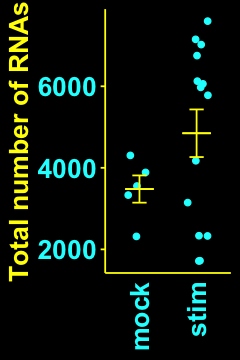

In [1]:
# Plot every point in the data with mean +/- sem 

library(ggplot2)
library(repr)


# Load data (csv file in tall format)
stats <- read.csv("~/Google Drive/Talks/2018_FlyClub_talk_data.csv")

# Define variables
attach(stats)

# Adjust plot size
options(repr.plot.width=2, repr.plot.height=3)

# Calculate descriptive statistics
library(plyr)

cdata <- ddply(stats, c("opto_condition"), summarise,
N    = length(opto_sr),
mean = mean(opto_sr),
sd   = sd(opto_sr),
se   = sd / sqrt(N)
)
cdata

# Generate graph
p <- ggplot(stats, aes(opto_condition,opto_sr)) + 
    geom_point(position = position_jitter(width = 0.2), shape=19, color="cyan", stroke=.5) +
    stat_summary(fun.y = mean, fun.ymin = mean,fun.ymax = mean, geom = "errorbar", width = .5, colour = "yellow") + 
    stat_summary(fun.data = mean_se, geom = "errorbar", width = .25, colour = "yellow") +
    #stat_summary(fun.data = median.quartile, geom = "errorbar", width = .25, colour = "red") +
    #stat_summary(fun.y = mean, fun.ymin = mean, fun.ymax = mean, geom = "errorbar", width = 0.5, colour = "red") +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_rect(fill = "black",colour = "black"), axis.line = element_line(colour = "yellow"), plot.background = element_rect(color = "black", fill = "black")) +
    theme(axis.text.x = element_text(size=16, colour = "cyan", face="bold", vjust=(0.5), hjust=(1), angle=90),
          axis.text.y = element_text(size=16, colour = "cyan", face="bold"),
          axis.title.x=element_blank(),
          axis.title.y=element_text(colour="yellow", size=16, face="bold"),
          axis.ticks.y=element_line(colour="yellow"),
          axis.ticks.x=element_blank()) +
    #theme(panel.background = element_rect(fill = "black",colour = "black")+
    ylab("Total number of RNAs") +
    #ylab(expression(bold(D~(mu*m^2/s)))) + 
    #ylim(0.0, 1.5)+
    scale_x_discrete(limits=c("mock", "stim"))
p
ggsave(filename="sr_opto.pdf", plot=p, scale = 1, width = 5, height = 7, dpi = 600, limitsize = TRUE)

detach(stats)


	F test to compare two variances

data:  nmj_K_msp by nmj_K_condition_msp
F = 1.0069, num df = 30, denom df = 32, p-value = 0.9817
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4933942 2.0722679
sample estimates:
ratio of variances 
          1.006937 



	Welch Two Sample t-test

data:  nmj_K_msp by nmj_K_condition_msp
t = 1.837, df = 61.723, p-value = 0.07102
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12.32642 291.63043
sample estimates:
mean in group mock mean in group stim 
          665.2581           525.6061 


nmj_K_condition_msp,N,mean,sd,se
mock,31,665.2581,304.4459,54.68011
stim,33,525.6061,303.3955,52.81437


Warning message:
“Ignoring unknown parameters: stroke”Warning message:
“Ignoring unknown parameters: stroke”

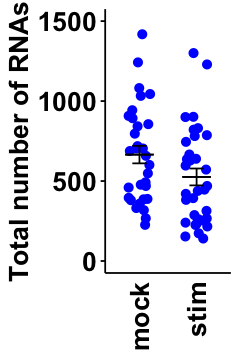

In [5]:
# Plot every point in the data with mean +/- sem 

library(ggplot2)
library(repr)


# Load data (csv file in tall format)
stats <- read.csv("~/Google Drive/Talks/2018_FlyClub_talk_data.csv")

# Define variables
attach(stats)

# Run F test 
var.test(nmj_K_msp ~ nmj_K_condition_msp, data = stats)

# Run T test
t.test(nmj_K_msp ~ nmj_K_condition_msp, stats)

# Adjust plot size
options(repr.plot.width=2, repr.plot.height=3)

# Calculate descriptive statistics
library(plyr)

cdata <- ddply(stats, c("nmj_K_condition_msp"), summarise,
N    = length(nmj_K_msp),
mean = mean(nmj_K_msp),
sd   = sd(nmj_K_msp),
se   = sd / sqrt(N)
)
cdata

# Generate graph
p <- ggplot(stats, aes(nmj_K_condition_msp,nmj_K_msp)) + 
    geom_point(position = position_jitter(width = 0.2), shape=19, color="blue", stroke=1) +
    stat_summary(fun.y = mean, fun.ymin = mean,fun.ymax = mean, geom = "errorbar", width = .5, colour = "black", stroke=5) + 
    stat_summary(fun.data = mean_se, geom = "errorbar", width = .25, colour = "black", stroke=5) +
    #stat_summary(fun.data = median.quartile, geom = "errorbar", width = .25, colour = "red") +
    #stat_summary(fun.y = mean, fun.ymin = mean, fun.ymax = mean, geom = "errorbar", width = 0.5, colour = "red") +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black")) +
    theme(axis.text.x = element_text(size=16, colour = "black", face="bold", vjust=(0.5), hjust=(1), angle=90),
          axis.text.y = element_text(size=16, colour = "black", face="bold"),
          axis.title.x=element_blank(),
          axis.title.y=element_text(colour="black", size=16, face="bold"),
          axis.ticks.y=element_line(colour="black"),
          axis.ticks.x=element_blank()) +

    #theme(panel.background = element_rect(fill = "black",colour = "black")+
    ylab("Total number of RNAs") +
    #ylab(expression(bold(D~(mu*m^2/s)))) + 
    ylim(0.0, 1500)+
    scale_x_discrete(limits=c("mock", "stim"))
p
ggsave(filename="sr_opto.pdf", plot=p, scale = 1, width = 5, height = 7, dpi = 600, limitsize = TRUE)

detach(stats)


	F test to compare two variances

data:  mean_intensity by genotype
F = 0.85602, num df = 644, denom df = 480, p-value = 0.0669
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7233847 1.0108785
sample estimates:
ratio of variances 
         0.8560194 



	Welch Two Sample t-test

data:  mean_intensity by genotype
t = -1.6334, df = 988.27, p-value = 0.1027
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.449981   1.047563
sample estimates:
mean in group control  mean in group mutant 
             108.3347              113.5359 


genotype,N,mean,sd,se
control,645,108.3347,50.48047,1.987667
mutant,481,113.5359,54.56091,2.487763


Warning message:
“Ignoring unknown parameters: stroke”Warning message:
“Ignoring unknown parameters: stroke”Warning message:
“Removed 9 rows containing missing values (geom_point).”

Warning message:
“Removed 10 rows containing missing values (geom_point).”

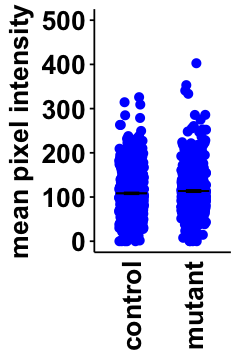

In [1]:
# Plot every point in the data with mean +/- sem 

library(ggplot2)
library(repr)


# Load data (csv file in tall format)
stats <- read.csv("~/Desktop/airyscan/matrix_means.csv")

# Define variables
attach(stats)

# Run F test 
var.test(mean_intensity ~ genotype, data = stats)

# Run T test
t.test(mean_intensity ~ genotype, data = stats)

# Adjust plot size
options(repr.plot.width=2, repr.plot.height=3)

# Calculate descriptive statistics
library(plyr)

cdata <- ddply(stats, c("genotype"), summarise,
N    = length(mean_intensity),
mean = mean(mean_intensity),
sd   = sd(mean_intensity),
se   = sd / sqrt(N)
)
cdata

# Generate graph
p <- ggplot(stats, aes(genotype,mean_intensity)) + 
    geom_point(position = position_jitter(width = 0.2), shape=19, color="blue", stroke=1) +
    stat_summary(fun.y = mean, fun.ymin = mean,fun.ymax = mean, geom = "errorbar", width = .5, colour = "black", stroke=5) + 
    stat_summary(fun.data = mean_se, geom = "errorbar", width = .25, colour = "black", stroke=5) +
    #stat_summary(fun.data = median.quartile, geom = "errorbar", width = .25, colour = "red") +
    #stat_summary(fun.y = mean, fun.ymin = mean, fun.ymax = mean, geom = "errorbar", width = 0.5, colour = "red") +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black")) +
    theme(axis.text.x = element_text(size=16, colour = "black", face="bold", vjust=(0.5), hjust=(1), angle=90),
          axis.text.y = element_text(size=16, colour = "black", face="bold"),
          axis.title.x=element_blank(),
          axis.title.y=element_text(colour="black", size=16, face="bold"),
          axis.ticks.y=element_line(colour="black"),
          axis.ticks.x=element_blank()) +

    #theme(panel.background = element_rect(fill = "black",colour = "black")+
    ylab("mean pixel intensity") +
    #ylab(expression(bold(D~(mu*m^2/s)))) + 
    ylim(0.0, 500)+
    scale_x_discrete(limits=c("control", "mutant"))
p
ggsave(filename="matrix_mean.pdf", plot=p, scale = 1, width = 5, height = 7, dpi = 600, limitsize = TRUE)

detach(stats)